# Multivocal Literature Review - Systematic Literature Review Data Analysis
This notebook shows how to use litstudy from inside a Jupyter notebook. It shows how to load a dataset, plot statistics, perform topic modeling, do network analysis, and some more advanced features.

This notebook focuses on the topic of federated DT.

# Imports Selected Studies

In [2]:
# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import re

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

In [4]:
from datetime import datetime

currentDateAndTime = datetime.now()
filename = (f'MLR_{currentDateAndTime.year}-{currentDateAndTime.month}-{currentDateAndTime.day}'
            f'_{currentDateAndTime.hour}-{currentDateAndTime.minute}-{currentDateAndTime.second}')
filename_xlsx = (f'MLR_{currentDateAndTime.year}-{currentDateAndTime.month}-{currentDateAndTime.day}'
            f'_{currentDateAndTime.hour}-{currentDateAndTime.minute}-{currentDateAndTime.second}.xlsx')

print(filename)

MLR_2025-1-25_13-8-30


In [6]:
############################## LOAD Cleaned papers ###################################

# with open('AAA/studies.txt', 'r') as file:
#     data = file.read().splitlines()
#     print(data)
    
# Load csv file
docs_bib = litstudy.load_scopus_csv('Results/Selected.csv')
print(len(docs_bib), 'papers loaded from selected papers list')

22 papers loaded from selected papers list


In [8]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

docs_found_scopus, docs_notfound_scopus = litstudy.refine_scopus(docs_bib)

100%|██████████| 22/22 [00:00<00:00, 75.90it/s]


In [10]:
print(len(docs_found_scopus), 'papers found on Scopus')
print(len(docs_notfound_scopus), 'papers were not found')
docs_bib_scopus = docs_found_scopus | docs_notfound_scopus
len(docs_bib_scopus)

22 papers found on Scopus
0 papers were not found


22

In [12]:
docs_bib = docs_bib_scopus # docs_bib_scopus | docs_bib_SemanticScholar | docs_bib_CrossRef
docs_filtered = docs_bib # .filter_docs(lambda d: d.publication_year >= 1990)

In [14]:
index = 0
data = []
while index < len(docs_filtered):
    # re.sub('[<\[\]>]', '', str(docs_filtered[index].authors))

    authorList = []
    for author in docs_filtered[index].authors or []:
        authorList.append(author.name)

    if type(docs_filtered[index].id.doi) == type(None):
        print(docs_filtered[index].title)
        doi_paper = ''
        doi_paper_custom = ''
        # print(doi_paper)
    else:
        doi_paper = str(docs_filtered[index].id.doi) # 'https://www.doi.org/' + 
        doi_paper_custom = 'https://www.doi.org/' + str(docs_filtered[index].id.doi)
        print(doi_paper)

    data.append({'Authors': '', 'Author full names': re.sub(r'[\[\'\]]', '', str(authorList)), 'Author(s) ID': '', 
    'Title': docs_filtered[index].title, 'Year': docs_filtered[index].publication_year, 'Source title': docs_filtered[index].publication_source, 
    'Volume': '', 'Issue': '', 'Art. No.': '', 'Page start': '', 'Page end': '', 'Page count': '', 'Cited by': docs_filtered[index].citation_count, 
    'DOI': doi_paper, 'Link': doi_paper_custom,  'Affiliations': re.sub(r'[\[\'\]]', '', str(docs_filtered[index].affiliations)), 
    'Authors with affiliations': '', 'Abstract': docs_filtered[index].abstract, 'Author Keywords': re.sub(r'[\[\'\]]', '', str(docs_filtered[index].keywords)), 
    'Index Keywords': '', 'Molecular Sequence Numbers': '',  'Chemicals/CAS': '', 'Tradenames': '', 'Manufacturers': '', 
    'Funding Details': '', 'Funding Texts': '', 'References': re.sub(r'[\[\'\]]', '', str(docs_filtered[index].references)), 'Correspondence Address': '', 'Editors': '', 'Publisher': docs_filtered[index].publisher, 
    'Sponsors': '', 'Conference name': '', 'Conference date': str(docs_filtered[index].publication_date), 'Conference location': '', 'Conference code': '', 'ISSN': '', 
    'ISBN': '', 'CODEN': '', 'PubMed ID': docs_filtered[index].id.pubmed, 'Language of Original Document': docs_filtered[index].language, 'Abbreviated Source Title': '', 'Document Type': docs_filtered[index].source_type, 
    'Publication Stage': '', 'Open Access': '', 'Source': '', 'EID': docs_filtered[index].id.scopusid})
    
    index += 1

# Saving first group of data to a single excel file
df = pd.DataFrame(data, columns=['Authors', 'Author full names', 'Author(s) ID', 
    'Title', 'Year', 'Source title', 
    'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by', 
    'DOI', 'Link',  'Affiliations', 'Authors with affiliations', 'Abstract', 'Author Keywords', 
    'Index Keywords', 'Molecular Sequence Numbers',  'Chemicals/CAS', 'Tradenames', 'Manufacturers', 
    'Funding Details', 'Funding Texts', 'References', 'Correspondence Address', 'Editors', 'Publisher', 
    'Sponsors', 'Conference name', 'Conference date', 'Conference location', 'Conference code', 'ISSN', 
    'ISBN', 'CODEN', 'PubMed ID', 'Language of Original Document', 'Abbreviated Source Title', 'Document Type', 
    'Publication Stage', 'Open Access', 'Source', 'EID'])

# Saving first group of data to a single csv file
df.to_csv('Results/' + filename + '.csv')

# Saving first group of data to a single excel file
df.to_excel('Results/' + filename_xlsx, index=False)

10.3390/buildings14072207
10.1145/3640314
10.1109/ISCSIC60498.2023.00046
10.1109/ACCESS.2022.3172964
10.1007/978-3-031-32515-1_7
10.36680/j.itcon.2022.008
10.1145/3478680
10.1145/3502265
10.1109/ACCESS.2021.3064192
10.1109/ISSE51541.2021.9582526
10.1145/3477244.3477985
10.1007/s10845-019-01512-w
10.1016/j.cirpj.2020.02.002
10.1109/JPROC.2020.2998530
10.1007/s10270-019-00757-6
10.1109/ACCESS.2019.2953499
10.1109/ACCESS.2021.3060863
10.1109/ICISS59129.2023.10291219
10.3390/s24186069
10.3390/app14030977
10.1093/eurheartj/ehaa159
10.1109/ICSA56044.2023.00015


# Selected Paper Analysis
Litstudy analysis

      Frequency
2019          1
2020          5
2021          4
2022          5
2023          3
2024          4


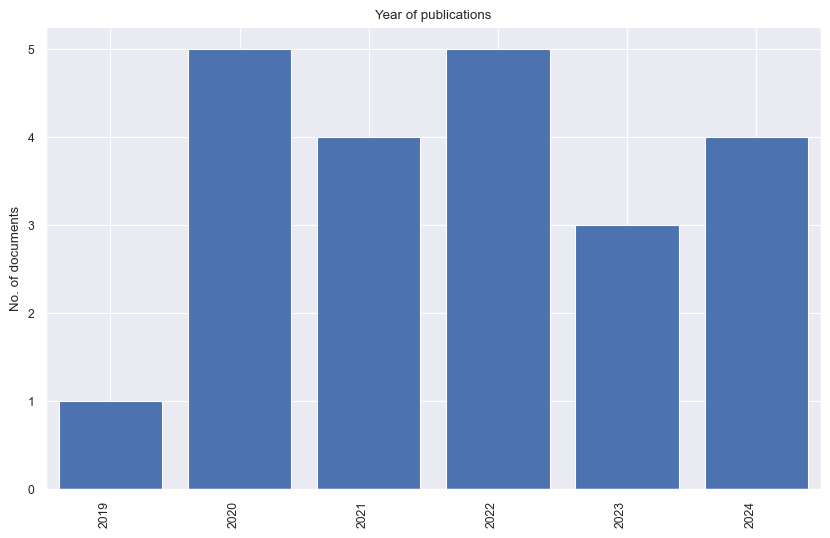

In [17]:
pdStatYear = litstudy.stats.compute_year_histogram(docs_filtered)
print(pdStatYear)

#plt.figure(1)
litstudy.plot_year_histogram(docs_filtered, vertical=True);
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.title('')
plt.grid(True)
plt.savefig('Results/' + str(filename) + '_01_plot_year_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

   index  Frequency Journal Conference Workshop Book Symposium Forum
0   2019          1       1          0        0    0         0     0
1   2020          5       5          0        0    0         0     0
2   2021          4       2          1        0    0         1     0
3   2022          5       4          1        0    0         0     0
4   2023          3       0          2        0    0         1     0
5   2024          4       4          0        0    0         0     0


Journal: 16
Conference: 4
Symposium: 2
Workshop: 0
Book: 0
Total: 22


Forum: 0




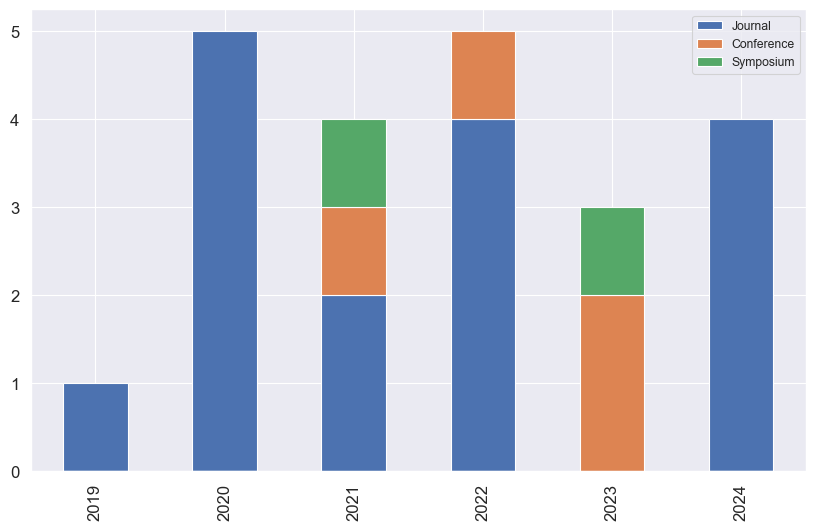

In [19]:
pdStatYear = litstudy.stats.compute_year_histogram(docs_filtered)
# print(pdStatYear)
pdStatYear["Journal"] = ""
pdStatYear["Conference"] = ""
pdStatYear["Workshop"] = ""
pdStatYear["Book"] = ""
pdStatYear["Symposium"] = ""
pdStatYear["Forum"] = ""
#for ind in pdStatYear.index:
#    print(pdStatYear[][ind], df['Frequency'][ind])
pdStatYear2 = pdStatYear.reset_index()
# print(pdStatYear2)
#df2 = pdStatYear2[pdStatYear2.columns[0]]
# print(pdStatYear2["index"][3])

# loop through the rows using iterrows()
for index, row in pdStatYear2.iterrows():
    # print(row['index'], row['Frequency'])
    
    docs_journal = docs_bib.filter_docs(lambda d: (d.source_type == 'Journal'  or d.id.doi == '10.1145/3696414') 
                                        and d.publication_year == row['index'])
    # print(len(docs_journal))
    pdStatYear2.loc[index,'Journal'] = len(docs_journal)
    
    pattern_conf = ['conference','XXX','lecture notes','congress','Design, Automation and Test in Europe']
    docs_conf = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                      d.id.doi == '10.24251/HICSS.2017.569') and d.publication_year == row['index'] and
                                     (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                     ( re.search(pattern_conf[0],str(d.publication_source),re.IGNORECASE) or 
                                       re.search(pattern_conf[1],str(d.publication_source),re.IGNORECASE) or 
                                       re.search(pattern_conf[2],str(d.publication_source),re.IGNORECASE) or
                                       re.search(pattern_conf[4],str(d.publication_source),re.IGNORECASE)  or
                                       re.search('studies',str(d.publication_source),re.IGNORECASE) or
                                        docs_filtered[index].id.doi == '10.1007/978-3-031-16088-2_4' or
                                        docs_filtered[index].id.doi == '10.1109/DEST.2010.5610662' or
                                       re.search('Event-Driven Interoperable Manufacturing Ecosystem for Energy Consumption Monitoring',str(docs_filtered[index].title),re.IGNORECASE) or
                                       re.search('forum',str(d.publication_source),re.IGNORECASE) ) and
                                       (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                       (not re.search('companion',str(d.publication_source),re.IGNORECASE)) and
                                       (not re.search('MODELS-C',str(d.publication_source),re.IGNORECASE)) and
                                       (not re.search('ICSA-C',str(d.publication_source),re.IGNORECASE)) )
    # print(len(docs_conf))  
    pdStatYear2.loc[index,'Conference'] = len(docs_conf)
    
    doc_workshop = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' ) and 
                                            d.publication_year == row['index'] and 
                                            (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                            (re.search('workshop',str(d.publication_source),re.IGNORECASE) or
                                             re.search('seminar',str(d.publication_source),re.IGNORECASE) or                                          
                                             re.search('2021 Design, Automation and Test in Europe Conference and Exhibition, DATE 2021',str(d.publication_source),re.IGNORECASE) or
                                             re.search('companion',str(d.publication_source),re.IGNORECASE) or 
                                             re.search('MODELS-C',str(d.publication_source),re.IGNORECASE) or 
                                             re.search('ICSA-C',str(d.publication_source),re.IGNORECASE) ) )
    
    # indexPP = 0
    # while indexPP < len(doc_workshop):
        # print(doc_workshop[indexPP].title)
        # print(doc_workshop[indexPP].source_type)
    #     indexPP += 1
    
    # print(len(doc_book_series))
    pdStatYear2.loc[index,'Workshop'] = len(doc_workshop)
    doc_book = docs_bib.filter_docs(lambda d: d.source_type == 'Book' and d.publication_year == row['index'])
    # print(len(doc_book))
    pdStatYear2.loc[index,'Book'] = len(doc_book)
    
    pattern_symp = ['symposium','']
    docs_symp = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                                d.id.doi == '10.24251/HICSS.2017.569')
                                     and d.publication_year == row['index'] and
                                     (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                     re.search(pattern_symp[0],str(d.publication_source),re.IGNORECASE) and
                                     (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                     (not re.search('conference',str(d.publication_source),re.IGNORECASE)) )
    # print(len(docs_conf))  
    pdStatYear2.loc[index,'Symposium'] = len(docs_symp)
                                     
    pattern_forum = ['forum','']
    docs_forum = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                                d.id.doi == '10.24251/HICSS.2017.569') and d.publication_year == row['index'] and
                                     (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                     re.search(pattern_forum[0],str(d.publication_source),re.IGNORECASE) )
    # print(len(docs_conf))  
    pdStatYear2.loc[index,'Forum'] = len(docs_forum)
    
#
print(pdStatYear2)
print('\n')
print('Journal:',pdStatYear2['Journal'].sum())
print('Conference:',pdStatYear2['Conference'].sum())
print('Symposium:',pdStatYear2['Symposium'].sum())
print('Workshop:',pdStatYear2['Workshop'].sum())
print('Book:',pdStatYear2['Book'].sum())
print('Total:',pdStatYear2['Journal'].sum()+pdStatYear2['Conference'].sum()+pdStatYear2['Workshop'].sum()+pdStatYear2['Book'].sum()+pdStatYear2['Symposium'].sum())
print('\n')
print('Forum:',pdStatYear2['Forum'].sum())
print('\n')

# plt.figure(2)
# fig, ax = plt.subplots()
pdStatYear2.plot.bar(x='index', y=['Journal','Conference','Symposium'], xlabel='', stacked=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('')
plt.grid(True)

"""
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
"""

plt.savefig('Results/' + str(filename) + '_02_plot_year_type_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

In [21]:
import re

index = 0
while index < len(docs_filtered):
    for author in docs_filtered[index].authors or []:
        re.sub(r'[\(\[].*?[\)\]]', '', str(author.name))
    index += 1

pdStatAuthors = litstudy.stats.compute_author_histogram(docs_filtered)

pdStatAuthors

,Frequency
Bucaioni A. (AUID: 56236820700),3
Wortmann A. (AUID: 56581745100),2
Behnam M. (AUID: 23484086800),2
Ferko E. (AUID: 57225194704),2
Grau V. (AUID: 55397587300),1
...,...
Lu J. (AUID: 57200760675),1
Wang G. (AUID: 55738687700),1
Li Z. (AUID: 57191702057),1
Naruse K. (AUID: 35580022600),1


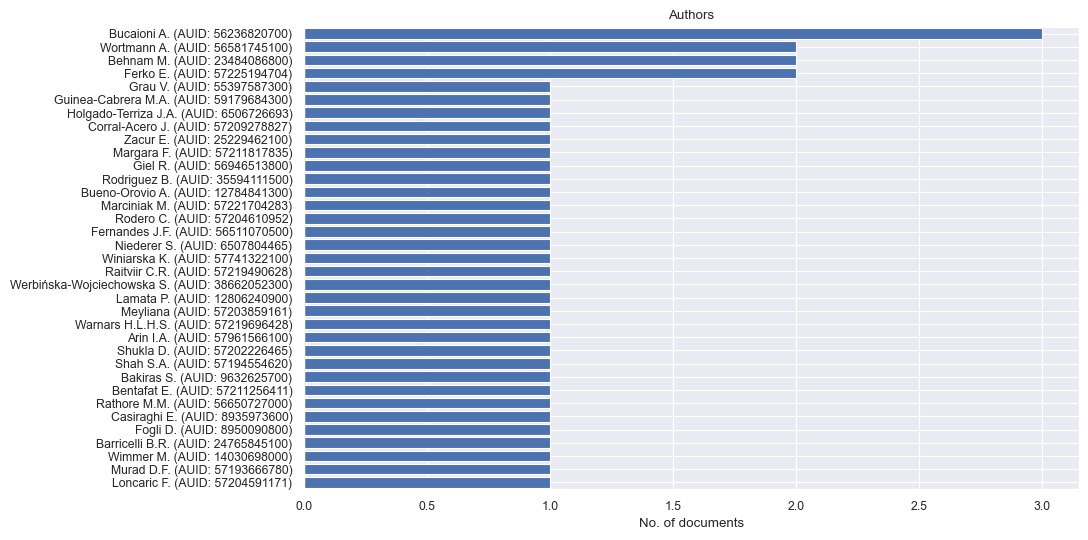

In [23]:
plt.figure(3)
litstudy.plot_author_histogram(docs_filtered, stacked=True, limit=35)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.title('')
plt.grid(True)
plt.savefig('Results/' + str(filename) + '_03_plot_authors_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

,Frequency
IEEE Access,4
ACM Computing Surveys,2
Buildings,1
CIRP Journal of Manufacturing Science and Technology,1
European Heart Journal,1
Applied Sciences Switzerland,1
Sensors,1
International Conference on ICT for Smart Society ICISS,1
Software and Systems Modeling,1
Proceedings of the IEEE,1


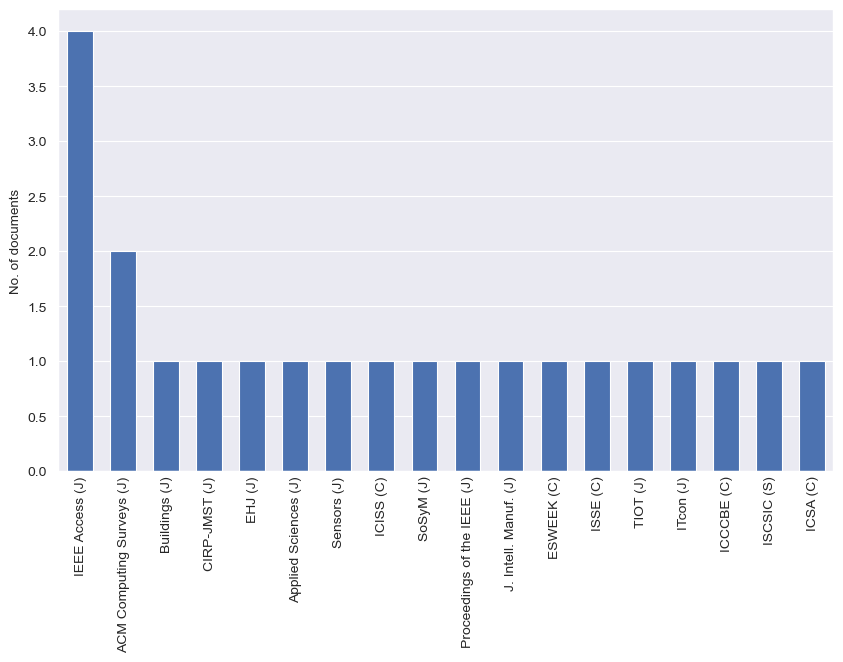

In [33]:
# This names are long, which is why a short abbreviation is provided.
mapping = {
    "Buildings": "Buildings (J)",
    "ACM Comput. Surv.": "ACM Computing Surveys (J)",   
    "2023 7th International Symposium on Computer Science and Intelligent Control, ISCSIC 2023": "ISCSIC (S)",
    "IEEE Access": "IEEE Access (J)",
    "19th International Conference on Computing in Civil and Building Engineering, ICCCBE 2022": "ICCCBE (C)",
    "Journal of Information Technology in Construction": "ITcon (J)",
    "ACM Transactions on Internet of Things": "TIOT (J)",
    "7th IEEE International Symposium on Systems Engineering, ISSE 2021": "ISSE (C)",
    "21st ACM SIGBED International Conference on Embedded Software, EMSOFT 2021, held as part of the Embedded Systems Week, ESWEEK 2021": "ESWEEK (C)",
    "3rd International Symposium on Computer Science and Intelligent Control, ISCSIC 2019": "ISCSIC (S)",
    "Journal of Intelligent Manufacturing": "J. Intell. Manuf. (J)",
    "CIRP Journal of Manufacturing Science and Technology": "CIRP-JMST (J)",
    "Proceedings of the IEEE": "Proceedings of the IEEE (J)",
    "23rd ACM/IEEE International Conference on Model Driven Engineering Languages and Systems, MODELS 2020": "MODELS (C)",
    "Software and Systems Modeling": "SoSyM (J)",
    "10th International Conference on ICT for Smart Society, ICISS 2023": "ICISS (C)",
    "Sensors": "Sensors (J)",
    "Applied Sciences (Switzerland)": "Applied Sciences (J)",
    "European Heart Journal": "EHJ (J)",
    "20th IEEE International Conference on Software Architecture, ICSA 2023": "ICSA (C)"
}

# This names are long, which is why a short abbreviation is provided.
import matplotlib.transforms

# plt.figure(4)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_filtered, vertical=True, label_rotation=0, bar_width=0.6, mapper=mapping, stacked=True, limit=25);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_04_plot_source_all_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

import csv

pdStatVenue = litstudy.stats.compute_source_histogram(docs_filtered)
display(pdStatVenue)
pdStatVenue.to_csv('Results/' + str(filename) + '_04_Venues_all.csv')   

In [35]:
docs_journal_all = docs_bib.filter_docs(lambda d: d.source_type == 'Journal'  or d.id.doi == '10.1145/3696414')
# print(len(docs_journal))

pattern_conf = ['conference','XXX','lecture notes','congress','Design, Automation and Test in Europe']
docs_conf_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                            d.id.doi == '10.24251/HICSS.2017.569') and
                                 (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                 ( re.search(pattern_conf[0],str(d.publication_source),re.IGNORECASE) or 
                                   re.search(pattern_conf[1],str(d.publication_source),re.IGNORECASE) or 
                                   re.search(pattern_conf[2],str(d.publication_source),re.IGNORECASE) or
                                   re.search(pattern_conf[4],str(d.publication_source),re.IGNORECASE) or
                                   re.search('studies',str(d.publication_source),re.IGNORECASE) ) and
                                   (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                   (not re.search('companion',str(d.publication_source),re.IGNORECASE)) )

doc_workshop_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                                  d.id.doi == '10.24251/HICSS.2017.569') and  
                                        (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                        (re.search('workshop',str(d.publication_source),re.IGNORECASE) or
                                         re.search('companion',str(d.publication_source),re.IGNORECASE) or
                                         re.search('forum',str(d.publication_source),re.IGNORECASE) ) )

doc_book_all = docs_bib.filter_docs(lambda d: d.source_type == 'Book')

pattern_symp = ['symposium','']
docs_symp_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                            d.id.doi == '10.24251/HICSS.2017.569') and
                                 (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                 re.search(pattern_symp[0],str(d.publication_source),re.IGNORECASE) and
                                   (not re.search('workshop',str(d.publication_source),re.IGNORECASE)) and
                                   (not re.search('conference',str(d.publication_source),re.IGNORECASE)) )

pattern_forum = ['forum','']
docs_forum_all = docs_bib.filter_docs(lambda d: (d.source_type == 'Conference Proceeding' or d.source_type == 'Book Series' or 
                                            d.id.doi == '10.24251/HICSS.2017.569') and
                                 (not d.id.doi == '10.1007/978-3-319-46508-1_13') and
                                 re.search(pattern_forum[0],str(d.publication_source),re.IGNORECASE) )

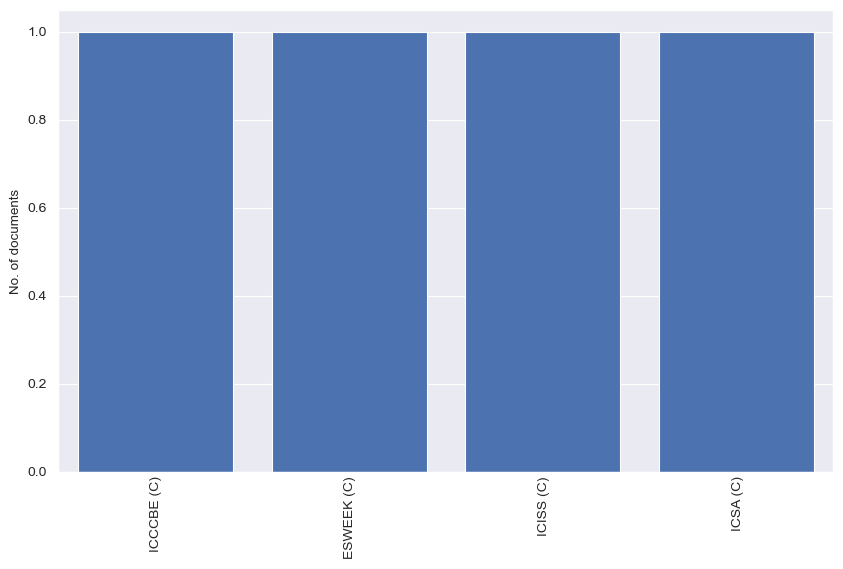

In [37]:
# plt.figure(5)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_conf_all, vertical=True, label_rotation=0, mapper=mapping, stacked=True);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_05_plot_source_conf_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

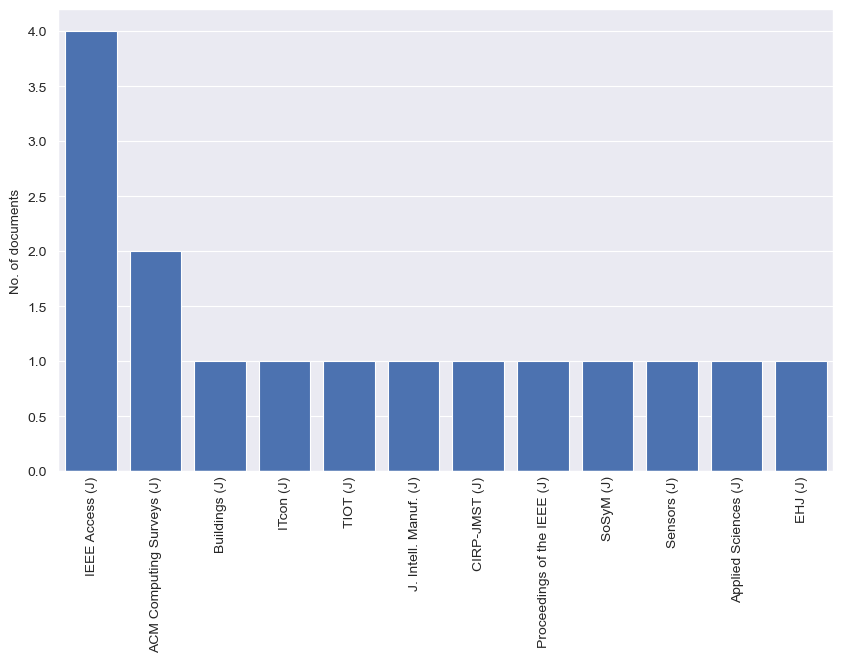

In [39]:
# plt.figure(6)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_journal_all, vertical=True, label_rotation=0, mapper=mapping, stacked=True);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_06_plot_source_journal_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

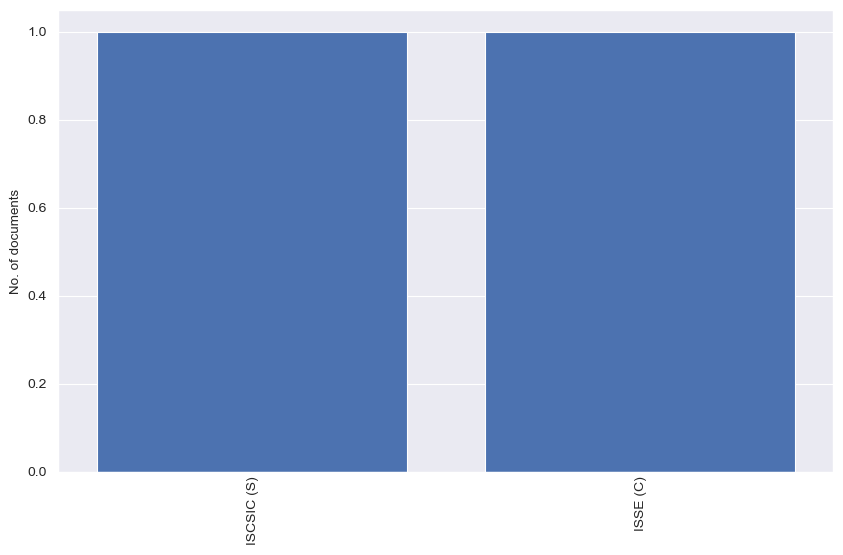

In [41]:
# plt.figure(8)
fig, ax = plt.subplots()
litstudy.plot_source_histogram(docs_symp_all, vertical=True, label_rotation=0, mapper=mapping, stacked=True);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_08_plot_source_symposium_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

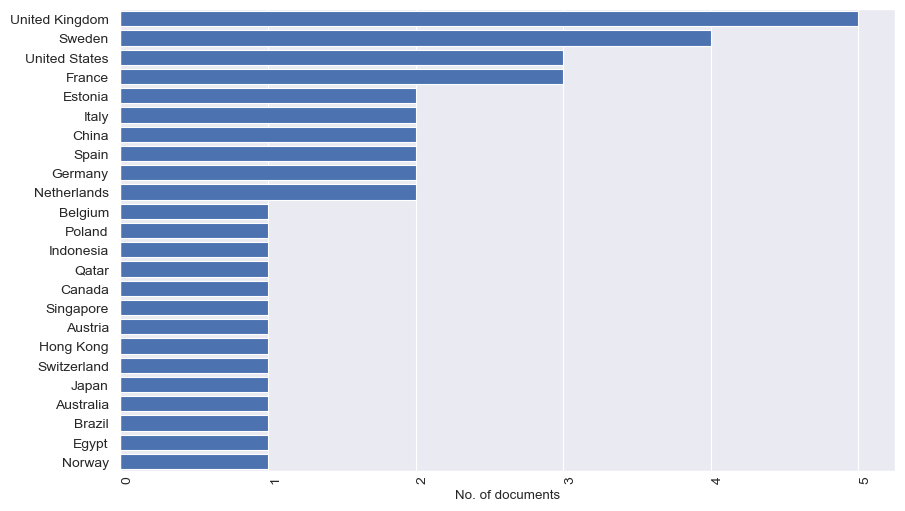

In [43]:
# plt.figure(8)
fig, ax = plt.subplots()
litstudy.plot_country_histogram(docs_filtered, limit=25);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_08_A_plot_Country.png', dpi=300, bbox_inches='tight', format="PNG")

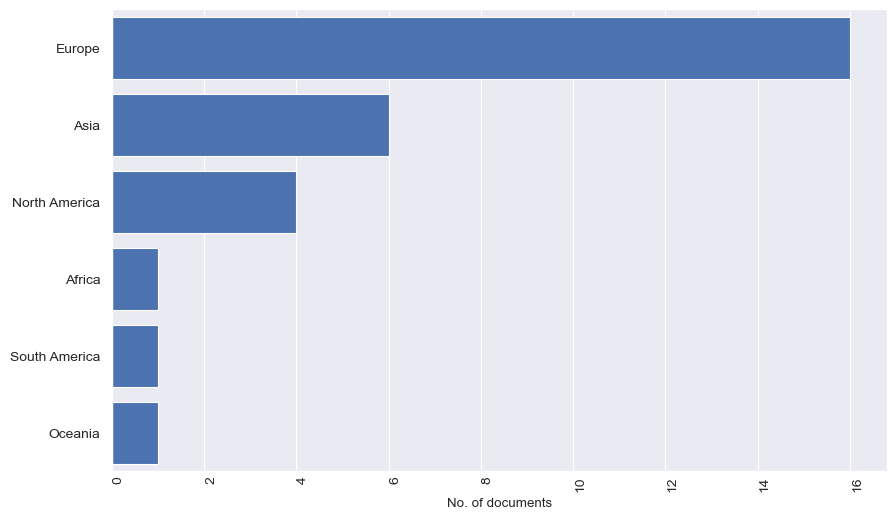

In [45]:
# plt.figure(8)
fig, ax = plt.subplots()
litstudy.plot_continent_histogram(docs_filtered);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('')

# rotates labels and aligns them horizontally to left 
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90, ha="left", rotation_mode="anchor")

plt.setp( ax.xaxis.get_majorticklabels(), rotation=90) 

# Create offset transform by 5 points in x direction
dx = 5/72.; dy = 5/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.savefig('Results/' + str(filename) + '_08_B_plot_Continent.png', dpi=300, bbox_inches='tight', format="PNG")

# Selected Paper Network Analysis
Litstudy Network analysis

## Citation network
Directed graph where each node corresponds to a document and each directed edge indicates that one document cites the other.

In [48]:
################################ CITATION NETWORK ###############################################
litstudy.plot_network(litstudy.build_citation_network(docs_filtered), smooth_edges=None, max_node_size=25, min_node_size=5, file_name='Results/' + str(filename) + '_09_network_full.html')

Results/MLR_2025-1-25_13-8-30_09_network_full.html


In [56]:
import networkx as nx

bb_full = litstudy.build_citation_network(docs_filtered)

In [58]:
index = 0
data = []

while index < len(bb_full.nodes):
    References = 0
    RefID = ''
    CitedBy = 0
    CitedID = ''
    
    print('Paper', index)
    print('Title:', bb_full.nodes[index].get('title'))
    print('Degree:', bb_full.degree[index])
    print('\n')
    
    for idx in range(len(bb_full.out_edges(index))):
        edgeOut = list(bb_full.out_edges(index))[idx]
        print('Reference Paper:', edgeOut[1])
        RefID = RefID + '<' + str(edgeOut[1]) + '>'
        print('Title:', bb_full.nodes[edgeOut[1]].get('title'))
        
        References += 1
    
    print('References:', References)
    print('\n')
    
    for idx in range(len(bb_full.in_edges(index))):
        edgeIn = list(bb_full.in_edges(index))[idx]
        print('Cited by Paper:', edgeIn[0])
        CitedID = CitedID + '<' + str(edgeIn[0]) + '>'
        print(CitedID)
        print('Title:', bb_full.nodes[edgeIn[0]].get('title'))
        CitedBy += 1
    
    print('Citations:', CitedBy)
    print('\n')
    
    data.append({'Paper': index, 'Title': bb_full.nodes[index].get('title'), 'Degree': bb_full.degree[index], 'ReferencesID': RefID, 'TotRef': References, 'CitedByID': CitedID, 'TotCit': CitedBy})
        
    index += 1
    
# Saving first group of data to a single excel file
df = pd.DataFrame(data, columns=['Paper', 'Title', 'Degree', 'ReferencesID', 'TotRef', 'CitedByID', 'TotCit'])

df.to_excel('Results/' + str(filename) + '_10_CitationGraphFull.xlsx', index=False)

Paper 0
Title: Conceptual Framework of Information Flow Synchronization Throughout the Building Lifecycle
Degree: 0


References: 0


Citations: 0


Paper 1
Title: Model-based Trustworthiness Evaluation of Autonomous Cyber-Physical Production Systems: A Systematic Mapping Study
Degree: 2


Reference Paper: 3
Title: Architecting Digital Twins
Reference Paper: 21
Title: Standardisation in Digital Twin Architectures in Manufacturing
References: 2


Citations: 0


Paper 2
Title: Survey and Practice on Architecture and Deployment Method of Digital Twin System for Intelligent Substation
Degree: 0


References: 0


Citations: 0


Paper 3
Title: Architecting Digital Twins
Degree: 8


Reference Paper: 13
Title: Digital Twin in the IoT Context: A Survey on Technical Features, Scenarios, and Architectural Models
Reference Paper: 15
Title: A survey on digital twin: Definitions, characteristics, applications, and design implications
Reference Paper: 16
Title: The Role of AI, Machine Learning, and B

## Co-citation network
Undirected graph where each node corresponds to a document and the edge weights stores the cocitation strengths (i.e., the number of times two documents have been cited together).

In [60]:
######################################### CO-CITATION NETWORK ########################################
litstudy.plot_cocitation_network(docs_filtered, smooth_edges=None, max_node_size=25, min_node_size=5, max_edges=500, file_name='Results/' + str(filename) + '_11_co-network_full.html')

Results/MLR_2025-1-25_13-8-30_11_co-network_full.html


In [73]:
import networkx as nx

bb_co_full = litstudy.build_cocitation_network(docs_filtered, max_edges=500)

bb_co_full.edges
bb_co_full.edges(18)
bb_co_full.get_edge_data(18,22)

In [75]:
index = 0
data = []

while index < len(bb_co_full.nodes):
    copaper = 0
    coID = ''
    coWeight = ''
    
    print('Paper', index)
    print('Title:', bb_co_full.nodes[index].get('title'))
    print('Degree:', bb_co_full.degree[index])
    print('\n')
    
    for idx in range(len(bb_co_full.edges(index))):
        edgeOut = list(bb_co_full.edges(index))[idx]
        print('Co-Paper:', edgeOut[1])
        coID = coID + '<' + str(edgeOut[1]) + '>'
        coWeight = coWeight + '<' + str(bb_co_full.get_edge_data(index,edgeOut[1])) + '>'
        print('Title:', bb_co_full.nodes[edgeOut[1]].get('title'))
        copaper += 1
        
    print('Tital Co-papers:', copaper)
    print('\n')
    
    data.append({'Paper': index, 'Title': bb_co_full.nodes[index].get('title'), 'Degree': bb_co_full.degree[index], 'Co-Paper-ID': coID, 'Co-Papers': copaper, 'Weight': coWeight})
        
    index += 1
    
# Saving first group of data to a single excel file
df = pd.DataFrame(data, columns=['Paper','Title', 'Degree', 'Co-Paper-ID', 'Co-Papers','Weight'])

df.to_excel('Results/' + str(filename) + '_12_Co-CitationGraphFull.xlsx', index=False)

Paper 0
Title: Conceptual Framework of Information Flow Synchronization Throughout the Building Lifecycle
Degree: 0


Tital Co-papers: 0


Paper 1
Title: Model-based Trustworthiness Evaluation of Autonomous Cyber-Physical Production Systems: A Systematic Mapping Study
Degree: 0


Tital Co-papers: 0


Paper 2
Title: Survey and Practice on Architecture and Deployment Method of Digital Twin System for Intelligent Substation
Degree: 0


Tital Co-papers: 0


Paper 3
Title: Architecting Digital Twins
Degree: 5


Co-Paper: 21
Title: Standardisation in Digital Twin Architectures in Manufacturing
Co-Paper: 15
Title: A survey on digital twin: Definitions, characteristics, applications, and design implications
Co-Paper: 12
Title: Characterising the Digital Twin: A systematic literature review
Co-Paper: 16
Title: The Role of AI, Machine Learning, and Big Data in Digital Twinning: A Systematic Literature Review, Challenges, and Opportunities
Co-Paper: 13
Title: Digital Twin in the IoT Context: A Su

## Bibligraphic coupling network
Undirected graph where nodes indicate documents and edge weights store the bibliographic coupling strength. This strength measures how similar two documents view related work. It is measured as the number of shared references between two documents.

In [78]:
######################################### COUPLING NETWORK ########################################
litstudy.plot_coupling_network(docs_filtered, max_edges=150, node_size=10, file_name='Results/' + str(filename) + '_13_co-network_full.html')

Results/MLR_2025-1-25_13-8-30_13_co-network_full.html


In [80]:
import networkx as nx

bb_coup_full = litstudy.build_coupling_network(docs_filtered, max_edges=500)

In [82]:
coup = 0
coupID = ''
coupWeight = ''
    
index = 0
for idx in range(len(bb_coup_full.edges(index))):
        edgeOut = list(bb_coup_full.edges(index))[idx]
        print('Coupling Paper:', edgeOut[1])
        coupID = coupID + '<' + str(edgeOut[1]) + '>'
        print('coupID:',coupID)
        coupWeight = coupWeight + '<' + str(bb_coup_full.get_edge_data(index,edgeOut[1])) + '>'
        print('coupWeight:',coupWeight)
        print('Title:', bb_coup_full.nodes[edgeOut[1]].get('title'))
        coup += 1

Coupling Paper: 12
coupID: <12>
coupWeight: <{'weight': 1, 'score': 1}>
Title: Characterising the Digital Twin: A systematic literature review
Coupling Paper: 18
coupID: <12><18>
coupWeight: <{'weight': 1, 'score': 1}><{'weight': 1, 'score': 1}>
Title: Digital Twin Approach for Operation and Maintenance of Transportation System—Systematic Review


In [89]:
import networkx as nx

bb_coup_full = litstudy.build_coupling_network(docs_filtered, max_edges=500)

# bb_coup_full.edges
#bb_coup_full.edges(1)
# bb_coup_full.get_edge_data(70,106)

index = 0
data = []
while index < len(bb_coup_full.nodes):
    print(bb_coup_full.edges(index))
    
    coup = 0
    coupID = ''
    coupWeight = ''
    
    print('Paper', index)
    print('Title:', bb_coup_full.nodes[index].get('title'))
    print('Degree:', bb_coup_full.degree[index])
    print('\n')
    
    for idx in range(len(bb_coup_full.edges(index))):
        edgeOut = list(bb_coup_full.edges(index))[idx]
        print('Coupling Paper:', edgeOut[1])
        coupID = coupID + '<' + str(edgeOut[1]) + '>'
        coupWeight = coupWeight + '<' + str(bb_coup_full.get_edge_data(index,edgeOut[1])) + '>'
        print('Title:', bb_coup_full.nodes[edgeOut[1]].get('title'))
        print('Overlapping References:',str(bb_coup_full.get_edge_data(index,edgeOut[1])))
        coup += 1
        
    print('Total Coupling Papers:', coup)
    print('\n')
    
    data.append({'Paper': index, 'Title': bb_coup_full.nodes[index].get('title'), 'Degree': bb_coup_full.degree[index], 'Coupling Paper': coupID, 'Total Coupling Papers': coup, 'Weight': coupWeight})
        
    index += 1
    
# Saving first group of data to a single excel file
df = pd.DataFrame(data, columns=['Paper','Title', 'Degree', 'Coupling Paper', 'Total Coupling Papers','Weight'])

df.to_excel('Results/' + str(filename) + '_14_Co-CitationGraphFull.xlsx', index=False)

[(0, 12), (0, 18)]
Paper 0
Title: Conceptual Framework of Information Flow Synchronization Throughout the Building Lifecycle
Degree: 2


Coupling Paper: 12
Title: Characterising the Digital Twin: A systematic literature review
Overlapping References: {'weight': 1, 'score': 1}
Coupling Paper: 18
Title: Digital Twin Approach for Operation and Maintenance of Transportation System—Systematic Review
Overlapping References: {'weight': 1, 'score': 1}
Total Coupling Papers: 2


[(1, 3), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 21)]
Paper 1
Title: Model-based Trustworthiness Evaluation of Autonomous Cyber-Physical Production Systems: A Systematic Mapping Study
Degree: 8


Coupling Paper: 3
Title: Architecting Digital Twins
Overlapping References: {'weight': 11, 'score': 11}
Coupling Paper: 14
Title: Modeling languages in Industry 4.0: an extended systematic mapping study
Overlapping References: {'weight': 5, 'score': 5}
Coupling Paper: 15
Title: A survey on digital twin: Defini

## Topic Modeling
Automatic topic discovery based on the words used in documents abstracts

In [200]:
################################## TOPIC MODELING ###################################
corpus = litstudy.build_corpus(docs_filtered, remove_words=['state', 'art', 'international',
        'publishing', 'nature', 'Switzerland', 'association', 'computing', 'rights', 'reserved',
        'owner', 'author', 'recent', 'years', 'enable', 'allows', 'introduce', 'existing', 'identify', 'efficient',
        'literature', 'respect', 'update', 'view', 'achieved', 'assessment',
        'address', 'aims', 'conducted', 'effective', 'enabling', 'facilitating', 'findings', 'important', 
        'increasing', 'information', 'including', 'related', 'relevant', 'specific', 'required', 'general', 
        'attention', 'discussed', 'field', 'reference', 'future', 'scientific', 'understand', 'opportunities', 
        'promising', 'explore', 'adoption', 'levels', 'support', 'optimize', 'areas', 'comprehensive', 'decision', 
        'making', 'potential', 'publications',
        'sectors', 'article', 'survey', 'approaches', 'collects', 'topic'], max_tokens=10000, ngram_threshold=0.01) # custom_bigrams=custom_big

In [202]:
index = 0
while index < len(corpus.dictionary): 
    first_key = list(corpus.dictionary.values())[index]
    print(first_key)
    index += 1 

framework
implementation
improvements
lifecycle
methods
processes
standards
technology
cyber
cyber_physical
domain
essential
intelligent
learning
manufacturing
physical
production
software
tools
trends
applications
architecture
complete
driven
management
challenges
performance
virtual
design
systematic_review
operation
require
techniques


In [204]:
len(corpus.frequencies)

22

In [206]:
indexFREQ = 0
while indexFREQ < len(corpus.frequencies): 
    # print('Paper:',indexFREQ)
    #print('Title:',docs_filtered[indexFREQ].title)
    word_key = list(corpus.frequencies)[indexFREQ]
    index = 0
    data = []
    while index < len(word_key): 
        word = list(corpus.dictionary.values())[(word_key[index][0])]
        #print('Word:',word,' Freq:',word_key[index][1])
        data.append({'Word': word,'Freq': word_key[index][1]})
        index += 1
    
    # Saving first group of data to a single excel file
    df = pd.DataFrame(data, columns=['Word', 'Freq'])

    # Saving first group of data to a single csv file
    df.to_csv('Results/docs/' + str(indexFREQ) + '_word_freq.csv')

    # Saving first group of data to a single excel file
    #df.to_excel('Results/' + filename_xlsx, index=False)
    
    indexFREQ += 1

In [208]:
df_corpus = litstudy.compute_word_distribution(corpus, limit=500).filter(like='_', axis=0).sort_index()
df_corpus
df_corpus.to_csv('Results/' + str(filename) + '_15_abstract_word_freq.csv')

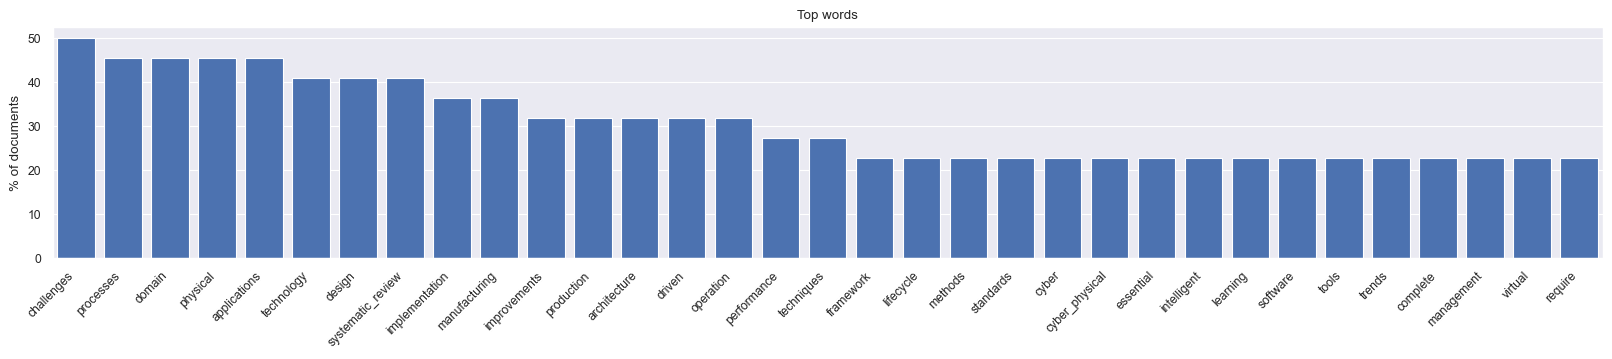

In [210]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, title="Top words", limit=100, vertical=True, label_rotation=45) # limit=25,
plt.savefig('Results/' + str(filename) + '_16_plot_word_distribution_histogram.png', dpi=300, bbox_inches='tight', format="PNG")

In [212]:
###################### ##################
num_topics = 10
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=500)

C:\Users\vitto\anaconda3\lib\site-packages\gensim\models\nmf.py:578: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
C:\Users\vitto\anaconda3\lib\site-packages\gensim\models\nmf.py:607: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
C:\Users\vitto\anaconda3\lib\site-packages\gensim\models\nmf.py:620: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


In [214]:
import os
if os.path.exists('Results/' + str(filename) + '_17_Topics.txt'):
    os.remove('Results/' + str(filename) + '_17_Topics.txt')

for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i), file=open('Results/' + str(filename) + '_17_Topics.txt', 'a')) # a

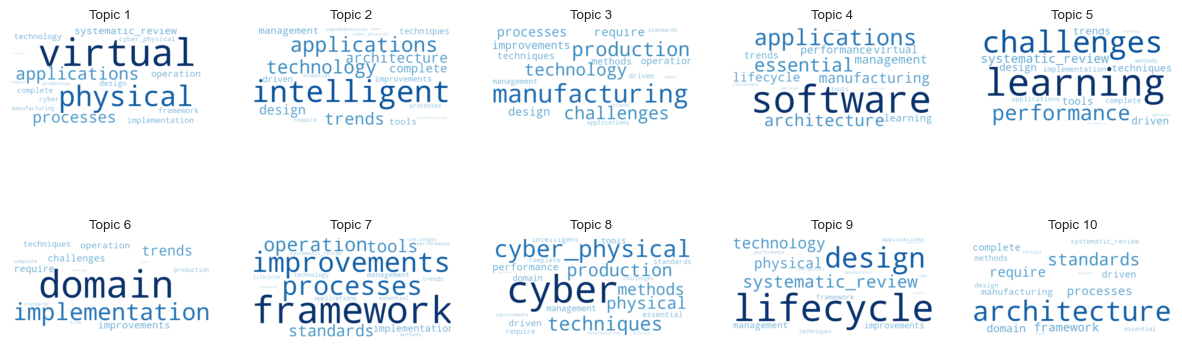

In [216]:
# Plot Topic Clouds
plt.figure(figsize=(15, 5))  # (25 topics: 25, 15), (15 Topics: 15, 5)
# litstudy.plot_topic_clouds(topic_model, ncols=5) 
litstudy.plot_topic_clouds(topic_model, ncols=5) 
plt.savefig('Results/' + str(filename) + '_18_plot_topic_clouds.png', dpi=300, bbox_inches='tight', format="PNG")

In [176]:
for doc_id in topic_model.best_topic_for_documents():
    index = int(doc_id)
    print(f'Topic n. {index} for: "', docs_filtered[index].title, '"')

Topic n. 11 for: " A state-of-the-art survey of Digital Twin: techniques, engineering product lifecycle management and business innovation perspectives "
Topic n. 6 for: " Service Computing for Industry 4.0: State of the Art, Challenges, and Research Opportunities "
Topic n. 9 for: " A Bibliometric Analysis on Model-based Systems Engineering "
Topic n. 5 for: " A REVIEW OF DIGITAL TWIN APPLICATIONS IN CONSTRUCTION "
Topic n. 9 for: " A Bibliometric Analysis on Model-based Systems Engineering "
Topic n. 2 for: " Survey and Practice on Architecture and Deployment Method of Digital Twin System for Intelligent Substation "
Topic n. 3 for: " Architecting Digital Twins "
Topic n. 14 for: " Modeling languages in Industry 4.0: an extended systematic mapping study "
Topic n. 5 for: " A REVIEW OF DIGITAL TWIN APPLICATIONS IN CONSTRUCTION "
Topic n. 10 for: " Model-driven system-performance engineering for cyber-physical systems "
Topic n. 1 for: " Model-based Trustworthiness Evaluation of Autono

In [116]:
for i in range(num_topics):
    topic_id = int(i)
    print(f'Topic n. {topic_id} for: "', topic_model.best_tokens_for_topic(topic_id), '"\n')
    for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
        print(docs_filtered[int(doc_id)].title)
    print('\n')

Topic n. 0 for: " ['lifecycle', 'cyber_physical', 'cyber', 'approaches', 'management'] "

A state-of-the-art survey of Digital Twin: techniques, engineering product lifecycle management and business innovation perspectives
Digital Twins in Software Engineering—A Systematic Literature Review and Vision
Modeling languages in Industry 4.0: an extended systematic mapping study
Standardisation in Digital Twin Architectures in Manufacturing
Survey on Cloud Robotics Architecture and Model-Driven Reference Architecture for Decentralized Multicloud Heterogeneous-Robotics Platform
Model-based Trustworthiness Evaluation of Autonomous Cyber-Physical Production Systems: A Systematic Mapping Study
Survey and Practice on Architecture and Deployment Method of Digital Twin System for Intelligent Substation
Architecting Digital Twins
How Can Digital Twins Support the Net Zero Vision?
A REVIEW OF DIGITAL TWIN APPLICATIONS IN CONSTRUCTION


Topic n. 1 for: " ['performance', 'methods', 'techniques', 'areas